Model accuracy: 59.70%


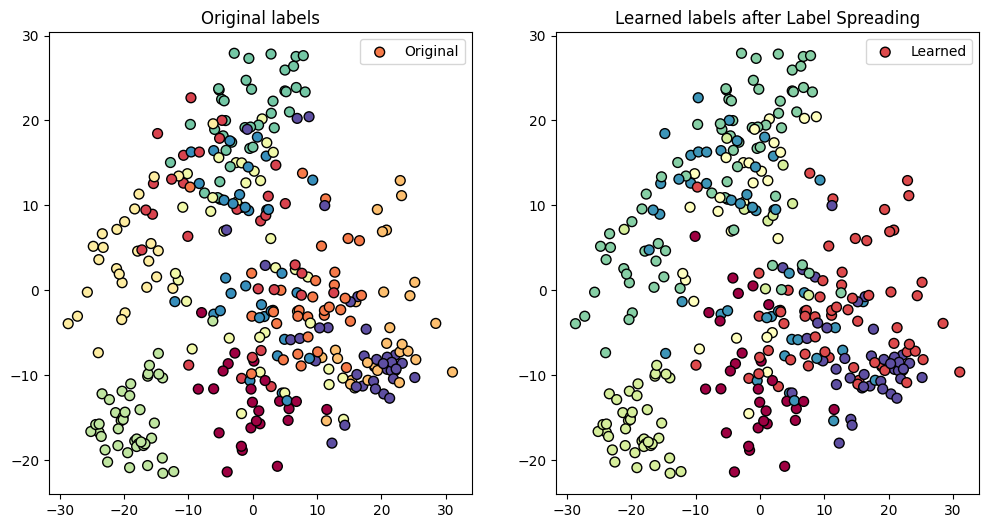

Confusion matrix:
 [[ 0 24  0  0  0  0  0  0  0  0]
 [ 0  1  5  0  0  0  8  5 11  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0 23  0  0  0  0  0  4  1]
 [ 0  0  0  0  0  0  1 26  0  0]
 [ 0  0  0  0  0 25  0  0  0 11]
 [ 0  1  0  0  0  0 40  0  1  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  4  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  3  0  2  3 30]]


In [1]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA  # To perform PCA to reduce dimensionality
import matplotlib.pyplot as plt

# Load the digit dataset and initialize as per your given code
digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)
X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]
n_total_samples = len(y)
n_labeled_points = 10

# Start with all labels as -1, marking them as unlabeled
unlabeled_indices = np.arange(n_total_samples)[n_labeled_points:]
labels = np.full(n_total_samples, -1.0)
labels[:n_labeled_points] = y[:n_labeled_points]  # Label the first 10 samples

# Perform PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create a Label Spreading model and fit it to the initially labeled data
label_spread = LabelSpreading(kernel='knn', alpha=0.8)
label_spread.fit(X, labels)

# Perform Label Spreading and predict the entire set
labels = label_spread.transduction_

# Calculate the accuracy of the model
accuracy = accuracy_score(y, labels)

# Print the accuracy
print(f"Model accuracy: {accuracy*100:.2f}%")

# Plot the spread of labels
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original labels with PCA-reduced data
ax[0].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='Spectral', edgecolor='black', s=50, label="Original")
ax[0].set_title("Original labels")
ax[0].legend()

# Plot the learned labels with PCA-reduced data
ax[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='Spectral', edgecolor='black', s=50, label="Learned")
ax[1].set_title("Learned labels after Label Spreading")
ax[1].legend()

plt.show()

# Output the confusion matrix
conf_mat = confusion_matrix(y, labels, labels=np.unique(y))
print("Confusion matrix:\n", conf_mat)



In [3]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score, confusion_matrix

# Load digit dataset
digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]
n_total_samples = len(y)
n_labeled_points = 10

# Initialize LabelPropagation model
label_prop_model = LabelPropagation(kernel='knn', n_neighbors=7, max_iter=1000)

for iteration in range(4):
    # Fit model with labeled data
    label_prop_model.fit(X[:n_labeled_points], y[:n_labeled_points])

    # Make predictions on all data (including unlabeled)
    y_pred = label_prop_model.predict(X)

    # Evaluate model performance
    accuracy = accuracy_score(y, y_pred)
    confusion_mat = confusion_matrix(y, y_pred)

    print(f"Iteration {iteration + 1} - Labeled Points: {n_labeled_points}")
    print(f"Accuracy: {accuracy:.3f}")
    print("Confusion Matrix:")
    print(confusion_mat)

    # Select the top 5 most confident points to label
    confidence_scores = label_prop_model.predict_proba(X)
    top_confident_indices = np.argsort(np.max(confidence_scores, axis=1))[-5:]

    # Add the confident points to the labeled set
    X_labeled = X[:n_labeled_points]
    y_labeled = y[:n_labeled_points]
    X_labeled = np.concatenate((X_labeled, X[top_confident_indices]))
    y_labeled = np.concatenate((y_labeled, y_pred[top_confident_indices]))

    # Increase the number of labeled points for the next iteration
    n_labeled_points += 5

    print("\n")

# Note: This code assumes a knn kernel for label propagation. You may need to adjust parameters based on your dataset.


Iteration 1 - Labeled Points: 10
Accuracy: 0.242
Confusion Matrix:
[[ 0  0  1  0  0  0 23  0  0  0]
 [ 0  1 17  0  0  0  3  0  9  0]
 [ 0  0 32  0  0  0  1  0  0  0]
 [ 0  1 27  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  2  0]
 [ 0  1 13  0  0  0 19  0  3  0]
 [ 0  0  2  0  0  0 40  0  0  0]
 [ 0  3 13  0  0  0  3  0 18  0]
 [ 0  0 18  0  0  0 10  0  7  0]
 [ 0  0 28  0  0  0  4  0  6  0]]


Iteration 2 - Labeled Points: 15
Accuracy: 0.264
Confusion Matrix:
[[ 0  0  0  0  0  0 24  0  0  0]
 [ 0  0  4  0  0  0 19  0  7  0]
 [ 0  0 30  0  0  0  1  0  2  0]
 [ 0  0 27  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0 26  0  1  0]
 [ 0  0  1  0  0  0 19  0 16  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  2  7  0  0  0  5  0 23  0]
 [ 0  0  5  0  0  0 15  0 15  0]
 [ 0  1 11  0  0  0 13  0 13  0]]


Iteration 3 - Labeled Points: 20
Accuracy: 0.336
Confusion Matrix:
[[ 0  0  0  0  0  1 20  0  3  0]
 [ 1 15  3  0  0  0  8  0  3  0]
 [ 0  2 27  0  0  0  0  0  4  0]
 [ 0  1 26  0  0  0  0  0  1  0]
 